In [1]:
# Supervised Learning Survey 07/20/2021
# https://www.ibm.com/cloud/learn/supervised-learning
# https://machinelearningmastery.com/supervised-and-unsupervised-machine-learning-algorithms/
# Taiwanese Bankruptcy Datasets
# Taiwanese Bankruptcy Prediction. (2020). UCI Machine Learning Repository. https://doi.org/10.24432/C5004D.


import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import sklearn
import time
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC,SVC
from sklearn import svm

from sklearn.model_selection import cross_val_score # 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import StandardScaler, RobustScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV    # 
from sklearn.metrics import accuracy_score
#from sklearn.metrics import plot_confusion_matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import ensemble

from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve # 
from sklearn.model_selection import ShuffleSplit




from timeit import default_timer as my_timer
%matplotlib inline

In [2]:
# from https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


In [3]:
# Taiwanese Bankruptcy Prediction. (2020). UCI Machine Learning Repository. https://doi.org/10.24432/C5004D.
b_bankrupt = pd.read_csv("datasets/bankruptcy.csv", sep=',')

In [4]:
b_bankrupt.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [5]:
b_bankrupt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [6]:
b_bankrupt.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [7]:
b_bankrupt['Bankrupt?'].value_counts()

Bankrupt?
0    6599
1     220
Name: count, dtype: int64

In [8]:
# B - bankrupt
# S - solvent
# b_bankrupt['Bankrupt?'].replace('S',0)
b_bankrupt['Bankrupt?'].replace(0,'S')

0       1
1       1
2       1
3       1
4       1
       ..
6814    S
6815    S
6816    S
6817    S
6818    S
Name: Bankrupt?, Length: 6819, dtype: object

In [9]:
# b_bankrupt['Bankrupt?'].replace('B',1)
b_bankrupt['Bankrupt?'].replace(1,'B')

0       B
1       B
2       B
3       B
4       B
       ..
6814    0
6815    0
6816    0
6817    0
6818    0
Name: Bankrupt?, Length: 6819, dtype: object

In [10]:
b_bankrupt['Bankrupt?'].value_counts()

Bankrupt?
0    6599
1     220
Name: count, dtype: int64

In [11]:
b_bankrupt

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


<Axes: xlabel='Bankrupt?', ylabel='count'>

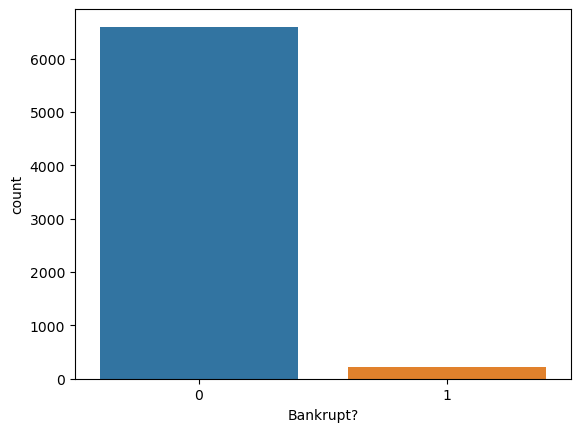

In [12]:
sns.countplot(x=b_bankrupt['Bankrupt?'])

In [13]:
# separation of the datasets
X_b = b_bankrupt.drop(['Bankrupt?'], axis=1)
Y_b = b_bankrupt['Bankrupt?']
X_b.head()
Y_b.head()

0    1
1    1
2    1
3    1
4    1
Name: Bankrupt?, dtype: int64

In [14]:
X_b.shape

(6819, 95)

In [15]:
Y_b.shape

(6819,)

In [16]:
X_b.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [17]:
Y_b

0       1
1       1
2       1
3       1
4       1
       ..
6814    0
6815    0
6816    0
6817    0
6818    0
Name: Bankrupt?, Length: 6819, dtype: int64

<Axes: xlabel='Bankrupt?', ylabel='count'>

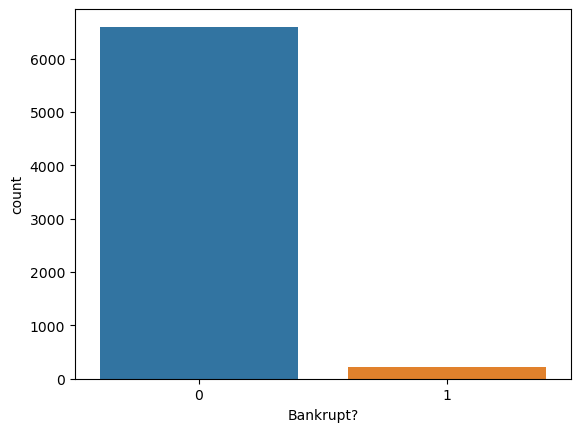

In [18]:
sns.countplot(x=Y_b)

In [19]:
Y_b.value_counts()

Bankrupt?
0    6599
1     220
Name: count, dtype: int64

In [20]:
#  https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
#
test_train_size = 0.25
X_train_b, X_test_b, Y_train_b, Y_test_b = train_test_split(X_b, Y_b, test_size=test_train_size, train_size=test_train_size, random_state = 1)
X_train_b_raw, X_test_b_raw, Y_train_b_raw, Y_test_b_raw = train_test_split(X_b, Y_b, test_size=test_train_size, train_size=test_train_size, random_state = 1)  

In [21]:
# scaling using StandardScaler:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html?highlight=standardscaler#sklearn.preprocessing.StandardScaler
sc=StandardScaler()
X_train_b = sc.fit_transform(X_train_b)
X_test_b = sc.transform(X_test_b)

In [22]:
# scaling using StandardScaler:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html?highlight=standardscaler#sklearn.preprocessing.StandardScaler
sc=StandardScaler()
X_scaled_b = sc.fit_transform(X_b)

In [23]:
X_scaled_b

array([[-2.21790935, -2.04579778, -2.400361  , ..., -0.09897786,
         0.        , -0.62206729],
       [-0.67382819, -0.31106786, -0.59844969, ...,  0.3645587 ,
         0.        , -0.53557337],
       [-1.30367191, -0.90841978, -1.3199096 , ..., -0.125015  ,
         0.        , -0.62195984],
       ...,
       [-0.53484482, -0.37919423, -0.53499599, ..., -0.01510132,
         0.        ,  1.0012064 ],
       [ 0.01787518,  0.01959426,  0.00740279, ..., -0.00427044,
         0.        , -0.07136384],
       [-0.19983866,  0.17495561, -0.06561243, ..., -0.01445435,
         0.        ,  3.72572884]])

In [24]:
X_train_b[:5]

array([[ 7.40989191e-01,  3.03910648e-01,  9.34503034e-01,
        -4.91301408e-01, -4.90712037e-01,  9.66621876e-02,
         3.95756080e-02,  4.24844047e-02,  1.48643966e-02,
         6.32510573e-02, -7.69031771e-02, -7.51114434e-01,
         2.41661833e-01, -1.58550683e-01, -8.12534170e-01,
        -5.26236420e-01, -5.25328014e-01, -5.26150470e-01,
        -3.82177549e-02,  3.23008648e-01, -2.42321908e-02,
         5.13674034e-02, -1.48162738e-01, -5.61831751e-02,
        -6.50501004e-03,  5.75218274e-02,  5.13513087e-02,
        -1.59093637e-02,  1.47388468e-01, -6.22700677e-02,
         1.89990969e-02,  4.03535386e-01, -6.40043858e-01,
        -4.09583094e-02,  1.14778002e-01, -9.61616565e-02,
         5.21647718e-03, -5.21647718e-03, -1.96934780e-01,
        -6.23713740e-03, -4.28579570e-02,  5.75018985e-02,
        -1.33656525e-01, -3.39308144e-01,  1.06648789e-01,
        -2.97523723e-02, -4.53889266e-02, -6.59349726e-01,
        -4.15072873e-01, -1.49675525e-02, -2.42321904e-0

**Improved Hyper Parameter Tuning for Decision Tree - Taiwanese Bankruptcy Dataset**

In [25]:
# Based on: ML Tutorial - Hyper Parameter Tuning 
# https://www.youtube.com/watch?v=HdlDYng8g9s
# https://github.com/codebasics/py/blob/master/ML/15_gridsearch/15_grid_search.ipynb
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=grid%20search#sklearn.model_selection.GridSearchCV
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decision%20tree#sklearn.tree.DecisionTreeClassifier
# Use GridSearchCV
clf_dct_grds_b = GridSearchCV(DecisionTreeClassifier(random_state=0), {
                                                    'criterion':('gini', 'entropy'),
                                                    'splitter': ('best', 'random'), 
                                                    'max_depth': [1,2,5,7,10,20],
                                                    'min_samples_leaf': [1,5,10,20,50],
                                                    'ccp_alpha': [0.0001,0.001,0.01,0.1],
                                                    'max_features':('auto', 'sqrt', 'log2')
                                                   }, cv=5, return_train_score=False)
start_time = my_timer()
clf_dct_grds_b.fit(X_train_b,Y_train_b)
#clf_dct_grds_c.fit(X,Y)
#clf_dct_grds.cv_results_
end_time = my_timer()
print("Decision Tree Grid Search Run time=", end_time-start_time)
print("Decision Tree Grid Search Results=", clf_dct_grds_b.cv_results_)

Decision Tree Grid Search Run time= 15.98661966200001
Decision Tree Grid Search Results= {'mean_fit_time': array([0.00049143, 0.00038934, 0.00045681, ..., 0.00146461, 0.00294867,
       0.00143461]), 'std_fit_time': array([1.13591819e-04, 1.66435978e-05, 8.09753176e-05, ...,
       7.80840320e-05, 7.31045328e-05, 3.49012227e-05]), 'mean_score_time': array([0.        , 0.        , 0.        , ..., 0.00061402, 0.00067954,
       0.00059781]), 'std_score_time': array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
       5.16752897e-05, 2.87756114e-05, 3.48484783e-05]), 'param_ccp_alpha': masked_array(data=[0.0001, 0.0001, 0.0001, ..., 0.1, 0.1, 0.1],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
            dtype=object), 'param_criterion': masked_array(data=['gini', 'gini', 'gini', ..., 'entropy', 'entropy',
                   'entropy'],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
          

/home/ubuntu/anaconda3/envs/ml-env-py310/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
2400 fits failed out of a total of 7200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2400 fits failed with the following error:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/ml-env-py310/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ubuntu/anaconda3/envs/ml-env-py310/lib/python3.10/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/home/ubuntu/anaconda3/envs/ml-env-py310/lib/python3.10/site-packages/sklearn/base.py", lin

In [26]:
clf_dct_grds_b.best_params_

{'ccp_alpha': 0.0001,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'splitter': 'random'}

In [27]:
clf_dct_grds_b.best_score_

0.9753562187338278

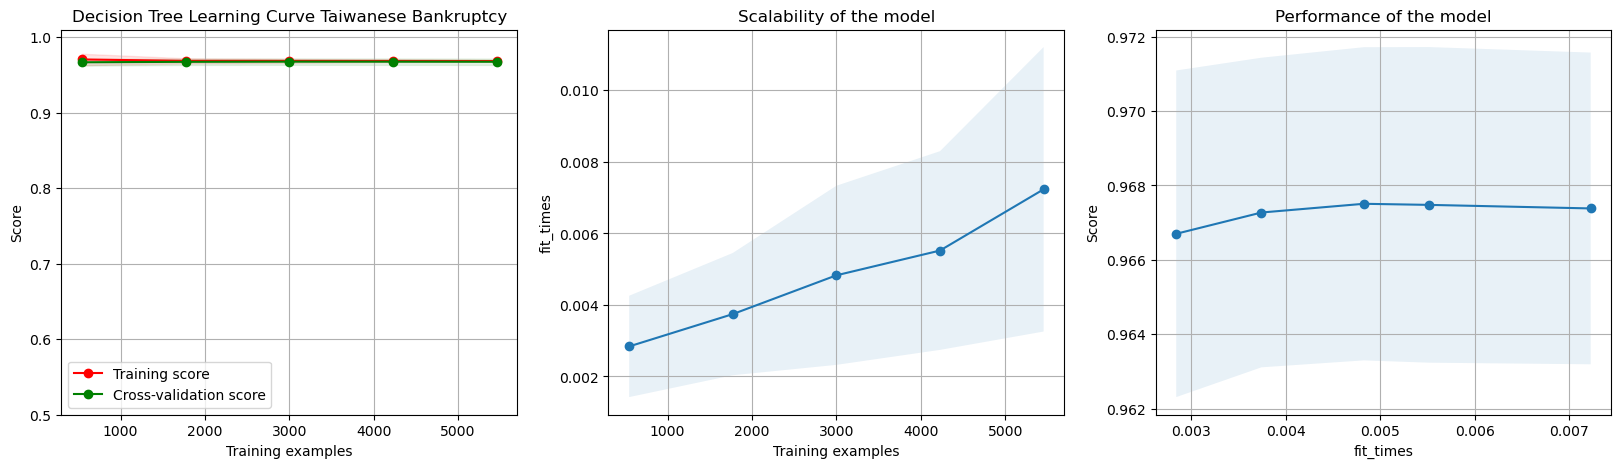

In [28]:
dct_best_b = clf_dct_grds_b.best_params_
dct_estimator_b = DecisionTreeClassifier(ccp_alpha=dct_best_b['ccp_alpha'],
                                       criterion=dct_best_b['criterion'],
                                       max_depth=dct_best_b['max_depth'],
                                       min_samples_leaf=dct_best_b['min_samples_leaf'],
                                       splitter=dct_best_b['splitter'],
                                       max_features=dct_best_b['max_features'])
dct_title_b = "Decision Tree Learning Curve Taiwanese Bankruptcy"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=1)
plot_learning_curve(dct_estimator_b, dct_title_b, X_scaled_b, Y_b, ylim=(0.5, 1.01),
                    cv=cv, n_jobs=4)
plt.savefig("images/bankruptcy/dct_grds_best_bankrupt.png")
plt.show()

**Improved Hyper Parameter Tuning for SVM Taiwanese Bankruptcy Dataset**

In [29]:
#Improved Hyper Parameter Tuning for SVM

# Based on: ML Tutorial - Hyper Parameter Tuning 
# https://www.youtube.com/watch?v=HdlDYng8g9s
# https://github.com/codebasics/py/blob/master/ML/15_gridsearch/15_grid_search.ipynb
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=grid%20search#sklearn.model_selection.GridSearchCV
# https://scikit-learn.org/stable/modules/svm.html#svm
# Use GridSearchCV
clf_svm_grds_b = GridSearchCV(svm.SVC(random_state=1), {
                                                    'C': [1,5,10,20,25, 50],
                                                    'kernel': ['rbf','linear', 'sigmoid'],
                                                    'gamma':[0.00001, 0.0001, 0.001, 0.01,0.1]  
                                                   }, cv=5, return_train_score=False)
start_time = my_timer()
clf_svm_grds_b.fit(X_train_b,Y_train_b)
#clf_svm_grds.cv_results_
end_time = my_timer()
print("SVM Grid Search Run time=", end_time-start_time)
print("SVM Grid Search Results=", clf_svm_grds_b.cv_results_)

SVM Grid Search Run time= 26.38539887899998
SVM Grid Search Results= {'mean_fit_time': array([0.02307529, 0.02083549, 0.00977235, 0.00988464, 0.02056704,
       0.0100141 , 0.01200438, 0.0208282 , 0.01017408, 0.01941252,
       0.02098989, 0.00977373, 0.10048003, 0.02076497, 0.01217484,
       0.00951433, 0.05842457, 0.01036754, 0.01073685, 0.05843911,
       0.01099172, 0.01249428, 0.05720334, 0.01014328, 0.01991367,
       0.05767508, 0.01057053, 0.10502071, 0.05903378, 0.01283116,
       0.00947957, 0.07926283, 0.01039367, 0.01067123, 0.07926464,
       0.01127572, 0.01152244, 0.07805257, 0.01023183, 0.01911182,
       0.07843237, 0.00868559, 0.10109525, 0.08248715, 0.01296892,
       0.00964174, 0.13331666, 0.01075807, 0.01069641, 0.13126283,
       0.0124052 , 0.01331172, 0.13351655, 0.00963283, 0.01895881,
       0.13275046, 0.00874639, 0.10009856, 0.13192954, 0.01311436,
       0.00960193, 0.19720254, 0.01087036, 0.01083078, 0.20114474,
       0.01193929, 0.01298156, 0.20040908,

In [30]:
clf_svm_grds_b.best_params_

{'C': 5, 'gamma': 0.0001, 'kernel': 'sigmoid'}

In [31]:
clf_svm_grds_b.best_score_

0.9759410039675694

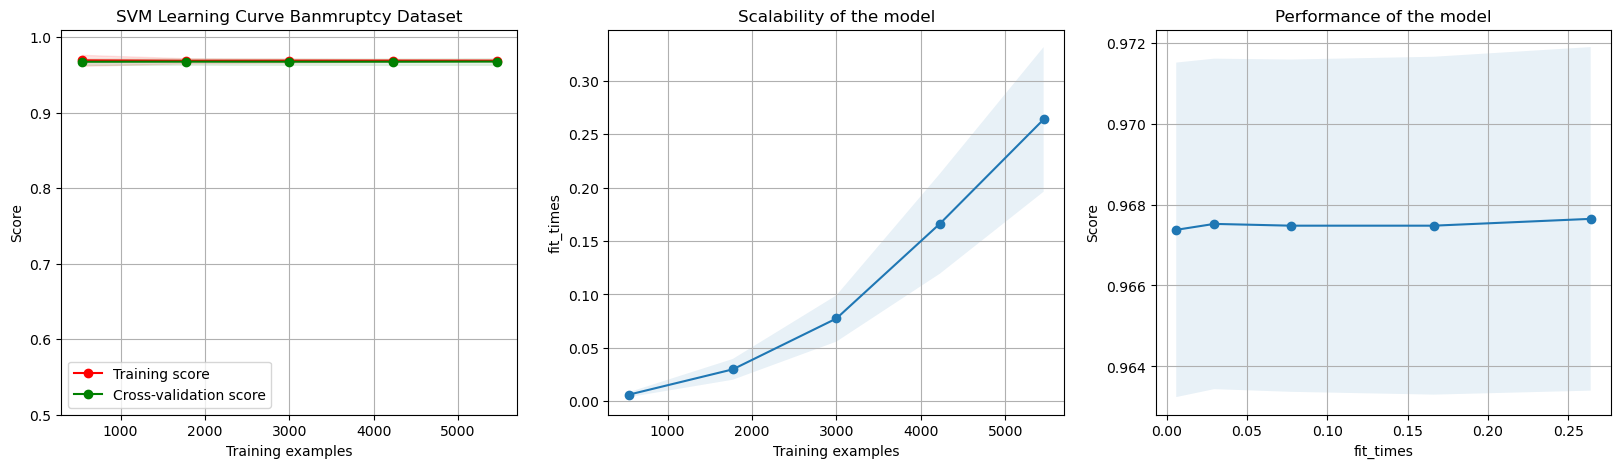

In [32]:
svm_best_b = clf_svm_grds_b.best_params_
svm_estimator_b = svm.SVC(C=svm_best_b['C'],
                        gamma=svm_best_b['gamma'],
                        kernel=svm_best_b['kernel'],
                        random_state=1)
svm_title_b = "SVM Learning Curve Banmruptcy Dataset"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=1)
plot_learning_curve(svm_estimator_b, svm_title_b, X_scaled_b, Y_b, ylim=(0.5, 1.01),
                    cv=cv, n_jobs=4)
plt.savefig("images/bankruptcy/svm_grds_best_bankrupt.png")
plt.show()

# Hyper Parameter Tuning for Neural Networks Bankruptcy Dataset

In [ ]:
# Based on: ML Tutorial - Hyper Parameter Tuning 
# https://www.youtube.com/watch?v=HdlDYng8g9s
# https://github.com/codebasics/py/blob/master/ML/15_gridsearch/15_grid_search.ipynb
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=grid%20search#sklearn.model_selection.GridSearchCV
# https://www.kaggle.com/hatone/mlpclassifier-with-gridsearchcv
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html?highlight=mlpclassifier#sklearn.neural_network.MLPClassifier
# Use GridSearchCV
clf_nn_grds_b = GridSearchCV(MLPClassifier(random_state=0),{
                                                    'hidden_layer_sizes': [(10,10),(20,20),(50,50)],
                                                    'max_iter': [2000,2500],
                                                    'solver': ['sgd','adam'],
                                                    'alpha':[0.00001, 0.0001, 0.001],
                                                    'power_t': [0.4,0.5, 0.6],
                                                    'activation':['relu', 'tanh', 'logistic']  
                                                   }, cv=5, return_train_score=False)
start_time = my_timer()
clf_nn_grds_b.fit(X_train_b,Y_train_b)
#clf_svm_grds.cv_results_
end_time = my_timer()
print("Neural Networks Grid Search Run time=", end_time-start_time)
print("Neural Networks Grid Search Results=", clf_nn_grds_b.cv_results_)

In [ ]:
clf_nn_grds_b.best_params_

In [ ]:
clf_nn_grds_b.best_score_

In [ ]:
nn_best_b = clf_nn_grds_b.best_params_
nn_estimator_b = MLPClassifier(hidden_layer_sizes=nn_best_b['hidden_layer_sizes'],
                             activation=nn_best_b['activation'],
                             alpha=nn_best_b['alpha'],
                             max_iter=nn_best_b['max_iter'],
                             power_t=nn_best_b['power_t'],
                             solver=nn_best_b['solver'],
                             random_state=1)
nn_title_b = "Neural Network Learning Curve Taiwanese Bankruptcy Dataset"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=1)
plot_learning_curve(nn_estimator_b, nn_title_b, X_scaled_b, Y_b, ylim=(0.5, 1.01),
                    cv=cv, n_jobs=4)
plt.savefig("images/bankruptcy/nn_grds_best_bankrupt.png")
plt.show()